In [1]:
#Choix du repertoire de données 
import os
os.chdir('/Users/learegazzetti/Documents/Cours/M1_Info/Data_Mining_M1_Info/Projet')

In [2]:
#Importation des données
import pandas
data=pandas.read_csv('data_avec_etiquettes.txt',sep="\t")

In [3]:
print(data.shape)

(494021, 200)


In [4]:
#Recodage des variables qualitatives : V160,V161,V162 en variables codées en 0/1
import numpy
liste_quali=[var for var in data.columns[:-1] if data[var].dtype==numpy.object_]

#Recodage des variables qualitatives
df_Recodage= pandas.get_dummies(data[liste_quali])

In [5]:
#Constitution du data frame entier avec les variables quantitatives 
#et qualitatives

#Liste des variables quantitatives
liste_quanti=[var for var in data.columns[:-1] if data[var].dtype!=numpy.object_]

#Réunir les quantitatives et les variables qualitatives recodées
data_New=pandas.concat([data[liste_quanti],df_Recodage],axis=1)

In [6]:
#Ajouter la variable cible : V200
data_New['V200'] = data.V200

In [7]:
#Affichage des informations du fichier
print(data_New.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Columns: 277 entries, V1 to V200
dtypes: float64(15), int64(181), object(1), uint8(80)
memory usage: 780.2+ MB
None


In [9]:
#Selection de variables
from sklearn.feature_selection import SelectFwe,f_classif
select=SelectFwe(f_classif,alpha=0.01)
select.fit(data_New[data_New.columns[0:276]],data_New.V200)
data_New.columns[0:276][select.pvalues_ < 0.01]

/Users/learegazzetti/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [174 175] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
/Users/learegazzetti/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Index(['V76', 'V157', 'V159', 'V163', 'V164', 'V165', 'V166', 'V167', 'V168',
       'V169',
       ...
       'V162_m10', 'V162_m11', 'V162_m2', 'V162_m3', 'V162_m4', 'V162_m5',
       'V162_m6', 'V162_m7', 'V162_m8', 'V162_m9'],
      dtype='object', length=116)

In [10]:
temp = data_New.iloc[:,0:276]

In [11]:
d = pandas.concat([temp.iloc[:,select.get_support()],data_New.V200],axis=1)

In [12]:
#On crée un dataframe composé de la moyenne de chacune des variables pour chaque modalité de V200
df = d.groupby('V200').mean()

In [13]:
df.head()

,V159,V163,V164,V165,V166,V167,V168,V169,V170,V171,...,V162_m10,V162_m11,V162_m2,V162_m3,V162_m4,V162_m5,V162_m6,V162_m7,V162_m8,V162_m9
V200,,,,,,,,,,,,,,,,,,,,,
m1,0.128915,54156.355878,8232.649569,0.00000,0.0,0.000000,1.963232,0.000000,1.00000,0.966409,...,0.955515,0.000000,0.000000,0.000000,0.0,0.041307,0.000000,0.000908,0.002270,0.000000
m10,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.186584,0.004244,0.0,0.000000,0.809172,0.000000,0.000000,0.000000
m11,0.000000,24.116883,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.554113,0.445887,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
m12,216.657322,1157.047524,3384.651000,0.00001,0.0,0.000031,0.044512,0.000185,0.71896,0.028537,...,0.942752,0.000000,0.054905,0.000689,0.0,0.000319,0.000524,0.000555,0.000175,0.000072
m13,41.333333,265.666667,2444.000000,0.00000,0.0,0.000000,0.000000,0.000000,1.00000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


In [17]:
#centrage-réduction des variables
from sklearn import preprocessing
d_cr = preprocessing.scale(df)

In [18]:
#librairie pour la CAH
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
#construction de la typologie
Z = linkage(d_cr,method='ward',metric='euclidean')

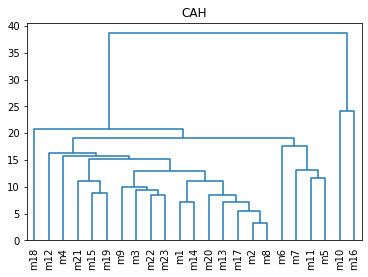

In [19]:
#affichage du dendrogramme
plt.title("CAH")
dendrogram(Z,labels=df.index,orientation='top',color_threshold=0,leaf_rotation=90)
plt.show()

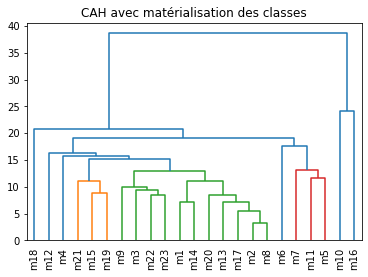

In [108]:
#et matérialisation des classes
plt.title('CAH avec matérialisation des classes')
dendrogram(Z,labels=df.index,orientation='top',color_threshold=15,leaf_rotation=90)
plt.show()


In [115]:
#découpage à la hauteur 
groupes_cah = fcluster(Z, t=15, criterion='distance')
print(groupes_cah)

[2 8 5 4 2 2 1 9 2 7 1 2 2 1 2 2 2 3 5 6 5 2 2]


In [116]:
#index triés des groupes
import numpy as np
idg = np.argsort(groupes_cah)
print(idg)

[13  6 10  0 16 15 14 12 21 11  8  5  4 22 17  3  2 18 20 19  9  1  7]


In [117]:
#affichage des observations et leurs groupes
res = pandas.DataFrame(df.index[idg],groupes_cah[idg])
print(res)

  V200
1  m21
1  m15
1  m19
2   m1
2   m3
2  m23
2  m22
2  m20
2   m8
2   m2
2  m17
2  m14
2  m13
2   m9
3   m4
4  m12
5  m11
5   m5
5   m7
6   m6
7  m18
8  m10
9  m16
